# Statistics (1)

Mainly from [Statistics 110 course of Harvard University](https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo)

## Probability and Counting

### Sample Space

- Set of all possible outcomes (or results) of an experiment
- For example `{HH, HT, TH, TT}`

### Event

- Subset of the sample space
- Set of outcomes

### Naive definition of Probability

$$
P(A) = \frac{\text{# of favorable outcomes}}{\text{# of all possible outcomes}}
$$

- P is a capital letter meaning probability.
- A is an event.
- This assumes that all outcomes are equally likely.

### Non-naive definition of probability
A probability sample consists of $P$ and $S$, where $S$ is a sample space, and $P$ is a function which takes an event $A$ which is $A \subseteq S$ as input, returns $P(A) \in [0, 1]$. Such that
- (Axiom 1) $P(\emptyset) = 0$, and $P(S) = 1$
- (Axiom 2) $P(\cup_{n=1}^{\infty}A_n) = \sum_{n=1}^{\infty}P(A_n)$ if $A_1$, $A_2$, ..., $A_n$ are disjoint.

#### basic properties

- $P(A^c) = 1 - P(A)$
- If $A\subseteq B$, then $P(A) \geq P(B)$
- $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

#### Inclusion-exclusion principle
$$
{\displaystyle {\begin{aligned}\left|\bigcup _{i=1}^{n}A_{i}\right|={}&\sum _{i=1}^{n}|A_{i}|-\sum _{1\leq i<j\leq n}|A_{i}\cap A_{j}|+\cdots {}\\&{}\cdots +\sum _{1\leq i<j<k\leq n}|A_{i}\cap A_{j}\cap A_{k}|-\cdots +(-1)^{n-1}\left|A_{1}\cap \cdots \cap A_{n}\right|.\end{aligned}}}	
$$

### Binomial Coefficient

$$
{\displaystyle {\begin{array}{rcl}(1{+}x)^{4}&=&{\tbinom {4}{0}}x^{0}+{\tbinom {4}{1}}x^{1}+{\tbinom {4}{2}}x^{2}+{\tbinom {4}{3}}x^{3}+{\tbinom {4}{4}}x^{4}\\&=&1+4x+6x^{2}+4x^{3}+x^{4},\end{array}}}
$$

where

$$
{\binom {n}{k}} = \text{n choose k} = {\frac {n!}{k!(n-k)!}}
$$
.

### Ball picking

Consider an infinite repository containing balls of $n$ different types. Then the following table summarizes the number of distinct ways in which $k$ balls can be picked for four common definitions of "distinct."	
	
|category|number of possible outcomes|
|---|---|
|ordered sampling with replacement|$n^k$|
|ordered sampling without replacement|$P(n,k)={n\cdot (n-1)\cdot (n-2)\cdots (n-k+1)}$|
|unordered sampling without replacement|$\binom{n}{k}$|
|unordered sampling with replacement|$\binom{n + k - 1}{k}$|

### Story Proof
(proof by interpretation)

#### example 1

$$
{\binom{n}{k}} = {\binom{n}{n-k}}
$$

Chooseing $k$ people out of $n$ people is also picking the other $n-k$ people not to choose.

#### example 2

$$
n{\binom{n-1}{k-1}} = k{\binom{n}{k}}
$$

To pick a leader from a group of $k$ members,
- we can choose a leader and make a club of $k-1$ members out of $n - 1$ people. Or,
- we can make a club of $k$ members and choose a leader out of a group. 

#### example 3 - Vandermonde Identity

$$
{\binom{m+n}{k}} = {\sum_{j=0}^{k}\binom{m}{j}}{\binom{n}{k-j}}
$$

### Birthday problem

How many people do you need in order to have at least 50 percentage of chance that 2 people have the same birthday?

Assumption
- There is no birthday of Feb 29th. We have 365 days per a year.
- 365 days are equally likely ignoring seasonal effects.
- Independence of birth which means we ignores twins.

If we pick k > 365 the probability is 1. (Pigeonhole principle)
If k <= 365,

$$
\begin{align}
P(\text{no match}) & = \frac{365\cdot364\cdot\dots\cdot(365-k+1)}{365^k} \\
\\
P(\text{match}) & = 1 - P(\text{no match})
\end{align}
$$

In [1]:
import math
import operator as op
from functools import reduce
from scipy.special import comb

In [2]:
def birthday_match (k):
    return 1 - reduce(op.mul, range(365, 365 - k, -1), 1) / (365**k)

for i in [1, 2, 3, 22, 23, 50, 100]:
    print(i, birthday_match(i), comb(i,2))
    

1 0.0 0.0
2 0.002739726027397249 1.0
3 0.008204165884781345 3.0
22 0.4756953076625501 231.0
23 0.5072972343239854 253.0
50 0.9703735795779884 1225.0
100 0.9999996927510721 4950.0


### Derangement
(Matching problem or de Montmort's problem)

There are n cards labeld 1, 2, ..., n.

Let $A_j$ be the event j-th card mathches meaning j-th card is j.

What is $P(A_1 \cup A_2 \cup \dots \cup A_n)$?

$$
\begin{align}
P(A_j) & = \frac{1}{n}, & \text{for all $j$ over $n$}\\
P(A_1 \cap A_2) & = \frac{(n-2)!}{n!} = \frac{1}{n\cdot(n-1)}, & \text{for $\binom{n}{2}$ cases} \\
P(A_1 \cap A_2 \cap A_3) & = \frac{(n-3)!}{n!} = \frac{1}{n\cdot(n-1)\cdot(n-2)}, & \text{for $\binom{n}{3}$ cases} \\
P(A_1 \cap A_2 \cap \dots \cap A_n) & = \frac{(n-k)!}{n!}
\end{align}
$$

So using inclusion-exclusion principle,

$$
\begin{align}
P(A_1 \cup A_2 \cup \dots \cup A_n) & = P(A_1) + P(A_2) + \dots + P(A_n) - P(A_1 \cap A_2) - \dots + P(A_1 \cap A_2 \cap A_3) + \dots\\
& = \binom{n}{1} \cdot \frac{1}{n} - \binom{n}{2} \cdot \frac{1}{n\cdot(n-1)} + \binom{n}{3} \cdot \frac{1}{n\cdot(n-1)\cdot(n-2)} - \dots + (-1)^{n+1}\cdot\binom{n}{n}\cdot\frac{1}{n!}\\
& = n \cdot \frac{1}{n} - \frac{n\cdot(n-1)}{2!} \cdot \frac{1}{n\cdot(n-1)} + \frac{n\cdot(n-1)\cdot(n-2)}{3!} \cdot \frac{1}{n\cdot(n-1)\cdot(n-2)} - \dots + (-1)^{n+1}\cdot1\cdot\frac{1}{n!}\\
& = 1 - \frac{1}{2!} + \frac{1}{3!} - \dots + (-1)^{n+1}\cdot\frac{1}{n!}\\
& \approx 1 - \frac{1}{e}
\end{align}
$$

### Independence

#### 2 events

Two events A and B are independent if and only if their joint probability equals the product of their probabilities.

$$
P(A\cap B) = P(A) \cdot P(B)
$$

#### 3 events

e.g. Events A, B, and C are mutually independent if

$$
P(A\cap B) = P(A) \cdot P(B) \quad and \\
P(B\cap C) = P(B) \cdot P(C) \quad and \\
P(C\cap A) = P(C) \cdot P(A) \quad and\\
P(A\cap B \cap C) = P(A) \cdot P(B) \cdot P(C)
$$.



###  Newton-Pepys Problem (1693)

Which is the most probable if dice is fair?

- A. at least one 6 with 6 dice
- B. at least two 6's with 12 dice 
- C. at least three 6's with 18 dice

$$
\begin{align}
P(A) & = 1 - {\left(\frac{5}{6}\right)}^6 \approx 0.6651\\
P(B) & = 1 - {\left(\frac{5}{6}\right)}^{12} - \binom{12}{1} \cdot {\left(\frac{1}{6}\right)}^1 \cdot {\left(\frac{5}{6}\right)}^{11} \approx 0.6187\\
P(C) & = 1 - \sum_{k=0}^{2} \binom{18}{k} \cdot \left(\frac{1}{6}\right)^k \cdot \left(\frac{5}{6}\right)^{18-k}\\
& = 1 - {\left(\frac{5}{6}\right)}^{18} - \binom{18}{1} \cdot {\left(\frac{1}{6}\right)}^1 \cdot {\left(\frac{5}{6}\right)^{17}}  - \binom{18}{2} \cdot \left(\frac{1}{6}\right)^{2} \cdot {\left(\frac{5}{6}\right)}^{16}\\
& \approx 0.5973 \\
\end{align}
$$

The answer is A.


In [3]:
from scipy.special import comb

print('P(A) =', 1 - (5/6)**6)
print('P(B) =', 1 - (5/6)**12 - comb(12, 1)*(1/6)*(5/6)**11)
print('P(C) =', 1 - (5/6)**18 - comb(18, 1)*(1/6)*(5/6)**17 - comb(18, 2)*(1/6)**2*(5/6)**16)

P(A) = 0.6651020233196159
P(B) = 0.6186673737323085
P(C) = 0.5973456859477229


### Conditional Probability

Definition

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

#### Theorems
1. $P(A \cap B) = P(A|B) \cdot P(B)$
2. $P(A_1, A_2, \cdots, A_n) = P(A_1)P(A_2|A_1)P(A_3|A_1,A_2)\cdots P(A_n|A_1, \dots,A_{n-1})$
3. Bayes' Theorem:
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

#### Law of total probability
If $A_1, A_2, \cdots, A_n$ partition S
$$
P(B) = P(B \cap A_1) + P(B \cap A_2) + \cdots + P(B \cap A_n)
$$.

#### example 1
Get random 2 cards out of standard deck. 

(1) What is the probability both cards are aces given the first card is an ace?

$$
\begin{align}
P(\text{both aces}|\text{have ace}) & = \frac{P(\text{both aces}, \text{have ace})}{P(\text{have ace})} =  \frac{\frac{\binom{4}{2}}{\binom{52}{2}}}{1 - \frac{\binom{52 - 4}{2}}{\binom{52}{2}}}\\
& = \frac{1}{33}
\end{align}
$$

(2) What is the probability both cards are aces given the first card is the ace of Spades?
$$
P(\text{both aces}|\text{have ace of Spades}) = \frac{3}{51} = \frac{1}{17}
$$

#### example 2

Patient get tested for a disease which afflict 1% of population. Suppose test is advertised as "95% accurate".

- Event D: Patient has positive
- Event T: Patient tests positive
- Assumes $P(T|D) = P(T^c | D^c) = 0.95$

$$
\begin{align}
P(D|T) & = \frac{P(T|D) \cdot P(D)}{P(T)}\\
& = \frac{P(T|D) \cdot P(D)}{P(T|D) \cdot P(D) + P(T|D^c) \cdot P(D^c)}\\
& = \frac{0.95 \cdot 0.01}{0.95 \cdot 0.01 + 0.05 \cdot 0.99}\\
& \approx 0.16
\end{align}
$$


In [4]:
import random
import numpy as np

N_SAMPLES = 1000000

groundTruthValues = np.empty(N_SAMPLES)
testResultValues = np.empty(N_SAMPLES)

for i in range(N_SAMPLES):
    groundTruth = random.random() < 0.01
    testResult = groundTruth if random.random() < 0.95 else not groundTruth
    groundTruthValues[i] = groundTruth
    testResultValues[i] = testResult

truePositive = np.count_nonzero((testResultValues == True)*(groundTruthValues == True))
trueNegative = np.count_nonzero((testResultValues == False)*(groundTruthValues == False))
falsePositive = np.count_nonzero((testResultValues == True)*(groundTruthValues == False))
falseNegative = np.count_nonzero((testResultValues == False)*(groundTruthValues == True))

print ('TP:', truePositive)
print('TN:', trueNegative)
print ('FP:', falsePositive)
print('FN:', falseNegative)
print('Answer(Precision):', truePositive / (truePositive + falsePositive))

TP: 9610
TN: 940575
FP: 49276
FN: 539
Answer(Precision): 0.16319668512040214


In [5]:
# P(D|T)
# = P(T|D) * P(D) / P(T)
# = P(T|D) * P(D) / (P(T|D) * P(D) + P(T|D^c)*P(D^c))
numerator = 0.95 * 0.01
denominator = 0.95*0.01 + 0.05*0.99
print('Answer:', numerator/denominator)

Answer: 0.16101694915254236


### Conditional independence
$$
P(A \cap B|C) = P(A | C) \cdot P(B | C)
$$

- Conditional independence doesn't mean independence
- Independence doesn't mean condtional independenc

### Monty Hall Problem

- There are 3 doors.
- 1 door has a car.
- 2 doors have goats.
- Monty Hall knows which is which.
- You pic 1 door. Monty Hall opens another door which has a goat.
- Would you change the door to open to get the car?

Answer is yes.

- Let $S$ be the chance you succeed to get a car when you change the door
- Let $D_i$ be the chance $Door_i$ has a car

$$
\begin{align}
P(S) & = P(S|D_1)\cdot P(D_1) + P(S|D_2) \cdot P(D_2) + P(S|D_3) \cdot P(D_3)\\
& = 0 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3}\\
& = \frac{2}{3} 
\end{align}
$$

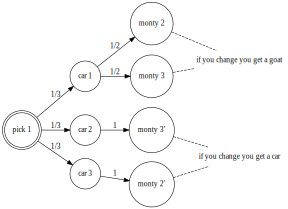

In [6]:
from graphviz import Digraph

f = Digraph('montyhall', filename='montyhall.gv')
f.attr(rankdir='LR', size='4')

f.attr('node', shape='doublecircle')
f.node('pick 1')

f.attr('node', shape='circle')
f.edge('pick 1', 'car 1', label='1/3')
f.edge('pick 1', 'car 2', label='1/3')
f.edge('pick 1', 'car 3', label='1/3')
f.edge('car 1', 'monty 2', label='1/2')
f.edge('car 1', 'monty 3', label='1/2')
f.edge('car 2', 'monty 3\'', label='1')
f.edge('car 3', 'monty 2\'', label='1')

f.attr('node', shape='plaintext')
f.attr('edge', style='dashed', arrowhead='none')
f.edge('monty 2', 'if you change you get a goat')
f.edge('monty 3', 'if you change you get a goat')
f.edge('monty 3\'', 'if you change you get a car')
f.edge('monty 2\'', 'if you change you get a car')

f

### Simpson's Paradox


<div style="display:flex; padding: 5%;">
<img src='assets/2019/DrHibbert.png' alt='Dr. Hibbert'>
<img src='assets/2019/DrNick.png' alt='Dr. Nick'/>
</div>	



Dr. Hibbert


| &nbsp;  | heart | band-aid |
|---|---|---|
| success | 70 | 10 |
| failure | 20 | 0 |		

Dr. Nick

| &nbsp;  | heart | band-aid |
|---|---|---|
| success | 2 | 81 |
| failure | 8 | 9 |

Although Nick has succeeded more in total, Hilbert has better chance to succeed for each type of surgery.


### Gambler's Ruin

- There are 2 gamblers, A and B.
- For each round both bet 1 dollor.
- $p = P(\text{A wins a certain round})$
- $q = P(\text{B wins a certain round}) = 1 - p$
- A starts with i dollors, B starts with (N-i) dollors.


Let's say
- $p_i = P(\text{A wins game} | \text{A starts with i})$
- $p_i = p \cdot p_{i+1} + q \cdot p_{i-1}$ where $(1 \leq i \leq N - 1)$
- $p_0 = 0$ (boundary condition)
- $p_N = 1$ (boundary condition)

Let's guess as $p_i = x^i$ then,

$$
\begin{align}
x^i = p \cdot x^{i+1} + q \cdot x^{i-1}\\
px^2 -x + q = 0
\end{align}
$$

$x = \large{\frac{1 \pm \sqrt{1 - 4pq}}{2p}}$

Since $q = 1 - p$ and $1 - 4pq = (2p-1)^2$

$x \in \{1, \frac{q}{p}\}$

These will not work. 

With the [difference equation](https://en.wikipedia.org/wiki/Linear_difference_equation), we should try the linear combination of them like below.

$$
p_i = A \cdot 1^i + B \cdot(\frac{q}{p})^i
$$

where assuming $p\neq q$ not to repeat the first term.

By applying boundary conditions we can find A and B.

$$
\begin{align}
p_0 = 0 & \Longrightarrow B = -A\\
p_N = 1 & \Longrightarrow 1 = A + B \cdot (\frac{q}{p})^N\\
A & = \frac{1}{1 - (\frac{q}{p})^N}
\end{align}
$$
i.e.

$$
\begin{align}
p_i = \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})^N}, \quad \text{if $p \neq q$}
\end{align}
$$

For the case of $p = q$,

we can find $p_i$ by applying [L'Hôpital's rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule).

$$
\text{Let's say } x = \frac{q}{p}.\\
\begin{align}
p_i & = \lim _{x \to 1}\frac {1-x^i}{1-x^N}\\
& = \lim _{x \to 1}\frac {1-x^i}{1-x^N}\\
& = \lim _{x \to 1}\frac {i \cdot x^{i-1}}{N \cdot x^{N-1}}\\
& = \frac{i}{N}
\end{align}
$$

So the finally we found $p_i$ like below.

$$
p_i =
\begin{cases}
\frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})^N} & \text{if $p \neq q$}\\
\frac{i}{N} & \text{if $p = q$}
\end{cases}
$$

Let's plug-in $i = N - i$ and $p = 0.49$, and see what we got.

$$
\begin{align}
N = 20 \Longrightarrow p_i \approx 0.40\\
N = 100 \Longrightarrow p_i \approx 0.12\\
N = 200 \Longrightarrow p_i \approx 0.02
\end{align}
$$

In [7]:
def p_i (N, i, p):
    if p == 0.5:
        return i / N
    x = (1-p)/p
    return (1 - x**i) / (1 - x**N)
    
p = 0.49
for N in [20, 100, 200]:
    print(N, p_i(N, N/2, p))
    


20 0.4012995229723709
100 0.11917491985551996
200 0.01797679001306744


### CDF

Cumulative Densitiy Function

$$
F(x) =  P(X \leq x) \text{, as a function of real $x$}
$$

Properties
- increasing
- right continuous
- $F(x) \to 0$ as $x \to -\infty$
- $F(x) \to 1$ as $x \to \infty$

In [8]:
# Example of CDF of discrete probability distribution

import numpy as np
import matplotlib.pyplot as plt

data = np.arange(0, 5)
y = np.array([.2, .6, .8, 1.])
yn = np.insert(y, 0, 0)

fig, ax = plt.subplots()
ax.set_facecolor('white')

ax.hlines(y=y, xmin=data[:-1], xmax=data[1:], color='red', zorder=1)

ax.vlines(x=data[:-1],ymin=yn[:-1], ymax=yn[1:], color='red',
          linestyle='dashed', zorder=1)

ax.scatter(data[0:-1], y, color='red', s=30, zorder=2)
ax.scatter(data[1:-1], yn[1:-1], color='white', s=30, zorder=2,
           edgecolor='red')
ax.grid(False)
ax.set_xlim(data[0], data[-1])
ax.set_ylim([-0.01, 1.01])

(-0.01, 1.01)

### Independence of random variables

X, Y are independent random variables if 

$$
P(X \leq x, Y \leq y) = P(X \leq x) \cdot P(Y \leq y)\\
\text{for all $x$, $y$}
$$
.

In discrete case,
$$
P(X=x, Y=y)=P(X=x)P(Y=y)
$$
.

### Indicator random variable
- 1: if it's the case
- 0: otherwise

### Expected value

Average of a descrete random variable

$$
E(X) = \sum_x{xP(X=x)}
$$

Summed over $x$ with $P(X=x) > 0$.

(Linearity properties)

- $E(X + Y) = E(X) + E(Y)$
- $E(cX) = cE(X)$

They are the same for even dependent random variables.

#### An example of picking aces.

- $X$ = number of aces in 5 cards without replacement
- $X_j$ = indicator of jth card being an ace

(Using Linearity)
$$
\begin{align}
E(X) & = E(X_1 + \cdots + X_5) \\
& = E(X_1) + \cdots + E(X_5) \\ 
& = 5 * P(\text{1st card ace}) \\
& = \frac{5}{13}
\end{align}
$$

Even though $X_j$s are dependent each other the linearity property works!

(Plain solution)

$$
\begin{align}
E(X) & = 0 \cdot P(X=0) + \cdots + 5 \cdot P(X=5) \\
& = \sum_{i=0}^4{i \cdot \frac{\binom{4}{i}\binom{52-4}{5-i}}{\binom{52}{5}}} + 5 \cdot 0\\
& = \frac{5}{13}
\end{align}
$$

In [9]:
from scipy.special import comb

sum = 0
denominator = comb(52, 5)

for i in range(6):
  p = comb(4, i) * comb(48, 5 - i)
  sum += (p * i) / denominator

print(sum)
print(5/13)


0.38461538461538464
0.38461538461538464


### Bernoulli distribution
$$
X \sim Bern(p)\\
$$

(Expected Value)

$$
E(X) = P(A) = p
$$

### Binomial distribution

- n draws
- k success
- without order
- with replacement

(Expected Value)

$$
E(X) = \sum_{k=0}^{n}{k \binom{n}{k} p^{k}q^{n-k}} = \cdots = np
$$

This can be derived easily by the linearity property of expected value.

$$
X_i \sim Bern(p)\\
E(X) = E(X_1 + X_2 + \cdots + X_n) = np\\
$$

where $X_i$ is indicator random variables

### Geometric distribution

$ Geom(p)$
- independent $Bern(p)$ trials
- count the number of failures before 1st success

PMF
- $P(X = k) = q^kp$
- $k \in \{0,1,2,\cdots\}$

(Validation of PMF)

$$
\begin{align}
\sum_{k=0}^{\infty}{q^kp} & = p \sum_{k=0}^{\infty}{q^k} \\
& = \frac{p}{1-q}\\
& = 1
\end{align}
$$

(Expected Value)

$$
\begin{align}
E(X) & = \sum_{k=0}^{\infty}{kq^kp} \\
& = p \sum_{k=1}^{\infty}{kq^k} \qquad \text{(1)}
\end{align}
$$

We can use the derivative of geometric series to solve this.

$$
\begin{align}
\sum_{k=0}^{\infty}{q^k} &= \frac{1}{1-q}\\\
\sum_{k=1}^{\infty}{kq^{k-1}} &= \frac{1}{(1-q)^2}\\
\sum_{k=1}^{\infty}{kq^k} &= \frac{q}{p^2}\\
\end{align}
$$

By plugging this back into (1),

$$
E(X) = \frac{pq}{p^2} = \frac{q}{p}
$$

(Story proof)
$$
c = E(X)\\
c = 0 \cdot p + (1 + c) \cdot q = q + cq\\
c = {q \over 1 - q} = {q \over p}
$$

### Hyper-geometric distribution

- total N balls
- total K success balls
  - there are only 2 types of balls like binomial distribution
- n draws
- k successes
- without order
- without replacement
  - each draw is dependent to each other
  - This is different from Binomial distribution
  - That's why we cannot use term as we do in binomial distribution. We use N and K instead.

PMF
$$
P(X = k) = {{{K \choose k}{{N-K} \choose {n-k}}} \over {N \choose n}}
$$